# NYC COVID-19 tests and cases

This Jupyter notebooks creates data visualizations about:
1. **New daily** COVID-19 numbers in NYC:
    * 1.A. Number of new daily COVID-19 **tests** in NYC
    * 1.B. Number of new daily COVID-19 **positive tests** in NYC
    * 1.C. **Percent** of new daily COVID-19 **positive tests** in NYC, i.e., the number of new daily COVID-19 (positive) cases in NYC (1.B) dividded by the number of new daily COVID-19 tests in NYC (1.A)
2. **Total cumulative** COVID-19 numbers in NYC:
    * 2.A. Number of total cumulative COVID-19 **tests** in NYC
    * 2.B. Number of total cumulative COVID-19 **positive tests** in NYC
    * 2.C. **Percent** of total cumulative COVID-19 **positive tests** in NYC, i.e., the number of total cumulative COVID-19 (positive) cases in NYC (2.B) dividded by the number of total cumulative COVID-19 tests in NYC (2.A)

Data source: "Health Data NY" from the New York State Department of Health: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e

## 0. Import dependencies

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pandas as pd

## 1. Read data

In [2]:
source_str = "Sources: Data: health.data.ny.gov - Chart: carlos-afonso.github.io/COVID-19"

file = '../data/ny-health/New_York_State_Statewide_COVID-19_Testing.csv'
df = pd.read_csv(file)
df

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,04/17/2020,Albany,29,648,291,6727
1,04/17/2020,Allegany,1,30,15,348
2,04/17/2020,Bronx,984,28019,2597,56443
3,04/17/2020,Broome,8,186,64,1331
4,04/17/2020,Cattaraugus,0,34,15,454
...,...,...,...,...,...,...
2909,03/02/2020,Washington,0,0,0,0
2910,03/02/2020,Wayne,0,0,0,0
2911,03/02/2020,Westchester,1,1,1,1
2912,03/02/2020,Wyoming,0,0,0,0


## 2. Select NYC data

New York City is composed of 5 regions which at the city levle are called boroughs, while at the state level are called counties. Here is the one-to-one mapping between boough and county names:

| Borough name  | County name |
| :------------ | :---------- |
| Bronx         | Bronx       |
| Brooklyn      | Kings       |
| Manhattan     | New York    |
| Queens        | Queens      |
| Staten Island | Richmond    |

Here we use the County names because the data is provided by the New York State.

In [3]:
# Check all the unique counties in the data
unique_counties = df['County'].unique()
print('Number of unique counties:', len(unique_counties))
print()
print('List of unique counties:')
print(unique_counties)

Number of unique counties: 62

List of unique counties:
['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New York' 'Niagara' 'Oneida' 'Onondaga'
 'Ontario' 'Orange' 'Orleans' 'Oswego' 'Otsego' 'Putnam' 'Queens'
 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga' 'Schenectady' 'Schoharie'
 'Schuyler' 'Seneca' 'St. Lawrence' 'Steuben' 'Suffolk' 'Sullivan' 'Tioga'
 'Tompkins' 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming'
 'Yates']


In [4]:
# Check all the unique dates in the data
unique_dates = df['Test Date'].unique()
print('Number of unique dates:', len(unique_dates))
print()
print('List of unique dates:')
print(unique_dates)

Number of unique dates: 47

List of unique dates:
['04/17/2020' '04/16/2020' '04/15/2020' '04/14/2020' '04/13/2020'
 '04/12/2020' '04/11/2020' '04/10/2020' '04/09/2020' '04/08/2020'
 '04/07/2020' '04/06/2020' '04/05/2020' '04/04/2020' '04/03/2020'
 '04/02/2020' '04/01/2020' '03/31/2020' '03/30/2020' '03/29/2020'
 '03/28/2020' '03/27/2020' '03/26/2020' '03/25/2020' '03/24/2020'
 '03/23/2020' '03/22/2020' '03/21/2020' '03/20/2020' '03/19/2020'
 '03/18/2020' '03/17/2020' '03/16/2020' '03/15/2020' '03/14/2020'
 '03/13/2020' '03/12/2020' '03/11/2020' '03/10/2020' '03/09/2020'
 '03/08/2020' '03/07/2020' '03/06/2020' '03/05/2020' '03/04/2020'
 '03/03/2020' '03/02/2020']


In [5]:
# Select the data for the 5 NYC counties
nyc_counties = ('Bronx', 'Kings', 'Queens', 'New York', 'Richmond')
nyc_cond = df['County'].isin(nyc_counties)

# Check that the number of data rows for each NYC county is the same as the number of unique dates
print('Number of unique dates:', len(unique_dates))
print()
print('Number of data rows for each NYC county:')
print(df[nyc_cond].groupby('County')['Test Date'].count())
print()

# Create a new dataframe with all the NYC data
print('NYC data:')
nyc_df = df[nyc_cond].groupby('Test Date').sum()
nyc_df

Number of unique dates: 47

Number of data rows for each NYC county:
County
Bronx       47
Kings       47
New York    47
Queens      47
Richmond    47
Name: Test Date, dtype: int64

NYC data:


,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
Test Date,,,,
03/02/2020,0,0,0,0
03/03/2020,0,0,8,8
03/04/2020,2,2,8,16
03/05/2020,2,4,36,52
03/06/2020,7,11,45,97
03/07/2020,0,11,64,161
03/08/2020,4,15,63,224
03/09/2020,12,27,130,354
03/10/2020,24,51,177,531


In [6]:
# Note:
# - Could drop the first row because it does not have any counts
# - But it's better to keep the first row because it's a Monday ('03/02/2020'), the start of the week
#nyc_df.drop(['03/02/2020'], inplace=True)
#nyc_df

## 3. Prepare NYC data for plotting

In [7]:
# Create column with the dates as datetime objects
nyc_df['date_obj'] = nyc_df.index.map(lambda x: datetime.strptime(x, '%m/%d/%Y').date())

# Create column with percent of new daily positive tests
nyc_df['new_pos_pct'] = 100 * nyc_df['New Positives'] / nyc_df['Total Number of Tests Performed']

# Create column with percent of total cumulative positive tests
nyc_df['cum_pos_pct'] = 100 * nyc_df['Cumulative Number of Positives'] / nyc_df['Cumulative Number of Tests Performed']

nyc_df

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,date_obj,new_pos_pct,cum_pos_pct
Test Date,,,,,,,
03/02/2020,0,0,0,0,2020-03-02,NaN,NaN
03/03/2020,0,0,8,8,2020-03-03,0.000000,0.000000
03/04/2020,2,2,8,16,2020-03-04,25.000000,12.500000
03/05/2020,2,4,36,52,2020-03-05,5.555556,7.692308
03/06/2020,7,11,45,97,2020-03-06,15.555556,11.340206
03/07/2020,0,11,64,161,2020-03-07,0.000000,6.832298
03/08/2020,4,15,63,224,2020-03-08,6.349206,6.696429
03/09/2020,12,27,130,354,2020-03-09,9.230769,7.627119
03/10/2020,24,51,177,531,2020-03-10,13.559322,9.604520


In [8]:
# Create x-axis values and labels for plots

n = len(nyc_df)

x_values = list(range(n))

x_labels = [''] * n

# Create first label
x_labels[0] = nyc_df['date_obj'][0].strftime("%#d\n%b")
last_full_label = x_labels[0]
x_values_with_labels = [i for i in x_values if (i%7==0 or i==(n-1))]
# Create middle labels
for i in x_values_with_labels[1:]:
    date = nyc_df['date_obj'][i]
    x_labels[i] = date.strftime("%#d\n%b")
    if x_labels[i][-3:] == last_full_label[-3:]:
        x_labels[i] = date.strftime("%#d")
    last_full_label = date.strftime("%#d\n%b")

#print(x_values)
#print(x_labels)
print(x_values_with_labels)
print([x_labels[i] for i in x_values_with_labels])

[0, 7, 14, 21, 28, 35, 42, 46]
['2\nMar', '9', '16', '23', '30', '6\nApr', '13', '17']


## 4. Plot new counts over time

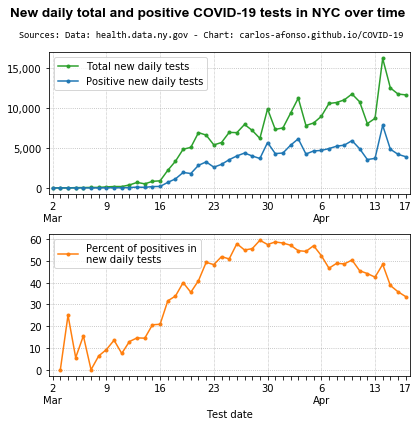

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 6))

title = 'New daily total and positive COVID-19 tests in NYC over time'
fig.suptitle(title, fontfamily='Arial', fontsize=13.7, fontweight='bold', x=0.49)

ax1.set_title(source_str, fontfamily='Consolas', fontsize=9.4, pad=15, x=0.45)

ax1.plot(nyc_df['Total Number of Tests Performed'], 'C2.-', label='Total new daily tests')
ax1.plot(nyc_df['New Positives'], 'C0.-', label='Positive new daily tests')

ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax1.legend() #title='New daily tests'

label = 'Percent of positives in\nnew daily tests'
#label = label + '\n' + '= 100 * positive tests / total tests'
ax2.plot(nyc_df['new_pos_pct'], 'C1.-', label=label)

ax2.legend() #loc='upper left', prop={'family': 'Arial'}, title='New daily tests'

ax2.set_xlabel('Test date')

for ax in (ax1, ax2):
    ax.set_xlim(-0.5, len(x_values)-0.5)
    ax.set_xticklabels(x_labels)
    ax.grid(axis='y', linestyle=':')
    for x in x_values_with_labels[:-1]:
        ax.axvline(x, linestyle=':', linewidth=0.5, color='gray')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [10]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-new-daily-tests-over-time'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## 5. Plot cumulative counts over time

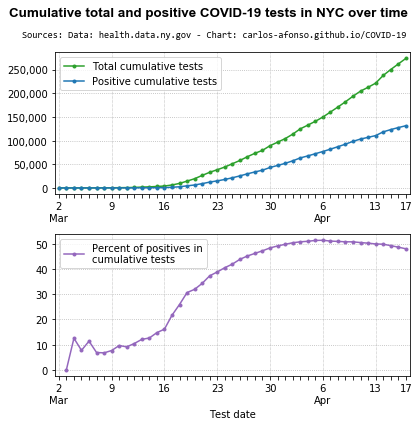

In [11]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 6))

title = 'Cumulative total and positive COVID-19 tests in NYC over time'
fig.suptitle(title, fontfamily='Arial', fontsize=13.4, fontweight='bold', x=0.49)

ax1.set_title(source_str, fontfamily='Consolas', fontsize=9.4, pad=15, x=0.45)

ax1.plot(nyc_df['Cumulative Number of Tests Performed'], 'C2.-', label='Total cumulative tests')
ax1.plot(nyc_df['Cumulative Number of Positives'], 'C0.-', label='Positive cumulative tests')

ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax1.legend() # title='Total cumulative tests'

ax2.plot(nyc_df['cum_pos_pct'], 'C4.-', label='Percent of positives in\ncumulative tests')

ax2.legend()

ax2.set_xlabel('Test date')

for ax in (ax1, ax2):
    ax.set_xlim(-0.5, len(x_values)-0.5)
    ax.set_xticklabels(x_labels)
    ax.grid(axis='y', linestyle=':')
    for x in x_values_with_labels[:-1]:
        ax.axvline(x, linestyle=':', linewidth=0.5, color='gray')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [12]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cumulative-tests-over-time'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## 6. Plot percent of positives over time

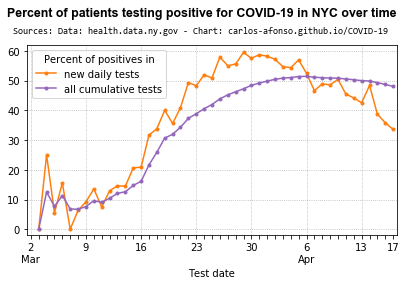

In [13]:
fig = plt.figure()

plt.plot(nyc_df['new_pos_pct'], 'C1.-', label='new daily tests')
plt.plot(nyc_df['cum_pos_pct'], 'C4.-', label='all cumulative tests')

legend_title = 'Percent of positives in'
#legend_title = 'Percent of COVID-19 positives in'
plt.legend(title=legend_title)

title = "Percent of patients testing positive for COVID-19 in NYC over time"
plt.suptitle(title, fontfamily='Arial', fontsize=12.4, fontweight='bold', x=0.5)

plt.title(source_str, fontfamily='Consolas', fontsize=9.2, pad=12, x=0.47)

plt.xlabel('Test date')
#plt.ylabel('Percent of positive tests')

plt.xlim(-0.5, len(x_values)-0.5)
plt.ylim(-2, 62)

plt.xticks(x_values, x_labels)

plt.grid(axis='y', linestyle=':')
for x in x_values_with_labels[:-1]:
    plt.axvline(x, linestyle=':', linewidth=0.5, color='gray')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [14]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-positive-pct-over-time'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

### Smaller version

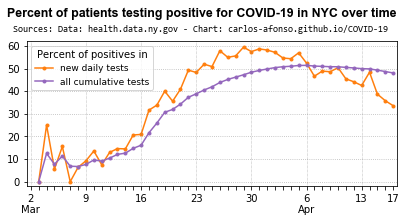

In [15]:
fig = plt.figure(figsize=(6, 3.1))

plt.plot(nyc_df['new_pos_pct'], 'C1.-', label='new daily tests')
plt.plot(nyc_df['cum_pos_pct'], 'C4.-', label='all cumulative tests')

legend_title = 'Percent of positives in'
#legend_title = 'Percent of COVID-19 positives in'
plt.legend(loc='upper left', title=legend_title, fontsize=9)

title = "Percent of patients testing positive for COVID-19 in NYC over time"
plt.suptitle(title, fontfamily='Arial', fontsize=12.4, fontweight='bold', x=0.5)

plt.title(source_str, fontfamily='Consolas', fontsize=9.2, pad=10, x=0.47)

#plt.xlabel('Test date')
#plt.ylabel('Percent of positive tests')

plt.xlim(-0.5, len(x_values)-0.5)
plt.ylim(-2, 62)

plt.xticks(x_values, x_labels)

plt.grid(axis='y', linestyle=':')
for x in x_values_with_labels[:-1]:
    plt.axvline(x, linestyle=':', linewidth=0.5, color='gray')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [16]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-positive-pct-over-time-small'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)